# Latar Belakang

New York City adalah salah satu kota terbesar dan paling sibuk di dunia, dan layanan taksi merupakan tulang punggung dari sistem transportasi kota. NYC Taxi and Limousine Commission (TLC) bertanggung jawab untuk mengatur dan mengawasi operasi taksi dan layanan kendaraan sewa lainnya di kota ini. Dengan jutaan perjalanan yang dilakukan setiap bulan, mengoptimalkan operasi dan layanan taksi sangat penting untuk menjaga kelancaran mobilitas di kota. Dataset yang digunakan mencakup berbagai informasi penting terkait operasi taksi di NYC. Data ini mencakup detail setiap perjalanan seperti waktu penjemputan dan pengantaran, lokasi penjemputan dan pengantaran, jumlah penumpang, jarak tempuh, tarif, metode pembayaran, dan biaya tambahan lainnya. Dengan data ini, TLC dapat melakukan analisis mendalam untuk memahami dan meningkatkan layanan taksi.



## Stakeholder

**Business Team NYC TLC**

Analisis ini ditujukan kepada tim bisnis NYC TLC. Melalui analisis ini, tim bisnis NYC TLC akan mendapatkan pemahaman yang lebih dalam terkait operasional serta perilaku pelanggan NYC TLC. Sehingga insight yang sudah diterima dapat membantu tim bisnis NYC TLC dalam mengidentifikasi masalah dan mendapatkan solusi untuk pengembangan model bisnis NYC TLC.

# Pernyataan Masalah

Stakeholder ingin memahami lebih dalam mengenai perilaku customer dalam upaya menciptakan strategi bisnis yang efektif. Dalam industri trasnportasi, mengoptimalkan operasional dan meningkatkan profit bertumpu pada kepuasan customer melalui pemahaman terhadap pola permintaan serta preferensi waktu dan tempat.

Oleh karena itu sebagai data analyst, kita akan mencoba menjawab pertanyaan berikut:
   
   ### • Apakah Durasi Perjalanan dan Jarak perjalanan memiliki pengaruh terhadap Total Pembayaran?

   ### • Daerah mana saja yang menjadi "Hot Zones" atau daerah tersibuk yang memesan taksi (weekdays)?

   ### • Tipe pembayaran apa yang menjadi pilihan utama pelanggan dalam melakukan pembayaran?

## Goals

This project analysis generally aims to provide insights on the day-to-day operations of NYC taxi, 
    
    1. Memahami dampak durasi dan jarak perjalanan terhadap jumlah tarif, maka dengan mengoptimalisasikan rute yang digunakan dapat mengurangi waktu perjalanan untuk meningkatkan kepuasan pelanggan.
   
    2. Memastikan ketersediaan taksi terdistribusi dengan baik, dengan mengidentifikasi daerah tersibuk, perusahaan dapat menempatkan armada dengan lebih efektif, mengurangi waktu tunggu pelanggan, dan meningkatkan penggunaan taksi.
   
    3. Mengidentifikasi preferensi metode pembayaran, sehingga perusahaan dapat menyesuaikan opsi pembayaran untuk memenuhi kebutuhan pelanggan.

# Dataset New York City TLC Trip Record

Berikut ini merupakan data yang digunakan [NYC TLC Trip Record](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N).

In [152]:
#import library
import pandas as pd
import numpy as np

import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
cf.go_offline()
import missingno as msno


#handle red notice
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('NYC TLC Trip Record.csv')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


Pada dataset ini terdapat informasi mengenai vendor, waktu pickup dan dropoff dan record perjalanan yang dilakukan oleh penumpang. Ada beberapa kolom di dalam dataset NYC TLC Trip Record, yaitu:
- VendorID : Kode yang menunjukkan penyedia LPEP yang menyediakan record. 1 - Creative Mobile Technologies, LLC. 2 -  VeriFone Inc.
- lpep_pickup_datetime : Tanggal dan waktu pickup penumpang.
- lpep_dropoff_datetime : Tanggal dan waktu dropoff penumpang.
- store_and_fwd_flag :Kode ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirimkan ke vendor, juga dikenal sebagai "store and forward", karena kendaraan tidak memiliki koneksi ke server. Y - catatan perjalanan disimpan dalam memori kendaraan. N - catatan perjalanan tidak disimpan dalam memori kendaraan.
- RatecodeID : Kode tarif akhir penumpang pada akhir perjalanan. 1 - tarif standard. 2 - John F. Kennedy International Airport. 3 - Newark. 4 - Nassau or Westchester. 5 - Negotiated Fare : tarif yang telah ditetapkan atau disepakati melalui negosiasi antara pelanggan dan penyedia layanan 6 - Group ride : Beberapa penumpang yang berbeda menggunakan kendaraan yang sama untuk tujuan yang serupa atau searah.
- PULocationID : ID lokasi pickup penumpang.
- DOLocationID : ID lokasi dropoff penumpang.
- passenger_count : Jumlah penumpang di dalam taksi.
- trip_distance : Jarak perjalanan yang tercatat pada taximeter.
- fare_amount : Tarif berdasarkan jarak termasuk biaya tambahan untuk jam sibuk dan perjalanan malam.
- extra : Biaya tambahan, saat ini hanya termasuk biaya jam sibuk serta biaya perjalanan malam.
- mta_tax : Pajak MTA (Metropolitan Transportation Authority) yang secara otomatis dipicu berdasarkan tarif yang dihitung oleh meter yang digunakan.
- tip_amount : Tip yang diberikan melalui kartu kredit.
- tolls_amount : Tarif tol jika dibutuhkan saat melakukan perjalanan.
- ehail_fee : Biaya tambahan yang dikenakan oleh layanan transportasi berbasis aplikasi ketika pengguna menggunakan untuk memesan kendaraan.
- improvement_surcharge : Biaya tambahan yang dikenakan pada perjalanan yang dipesan melalui tanda panggilan di titik penjemputan. Biaya peningkatan ini mulai diberlakukan pada tahun 2015.
- total_amount : Total tarif yang harus dibayar oleh penumpang (tidak termasuk tips berupa tunai).
- payment_type : Kode tipe pembayaran yang dilakukan penumpang. 1 - kartu kredit. 2 - tunai. 3- tidak ada biaya. 4 - ketidaksepakatan terkait dengan biaya, layanan, atau masalah lainnya antara pelanggan dan penyedia layanan. 5 - tidak diketahui. 6 - perjalanan yang dibatalkan.
- trip_type : Kode yang menunjukkan apakah perjalanan tersebut adalah panggilan di jalan atau pengiriman yang secara otomatis ditugaskan berdasarkan tarif yang dihitung oleh meter yang digunakan tetapi dapat diubah oleh pengemudi.
1 - Panggilan di jalan. 2 - Pengiriman
- congestion_surcharge : Tarif tambahan yang dikenakan kepada pengguna layanan transportasi untuk mengimbangi dampak kemacetan lalu lintas di area tertentu.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

Untuk mencari tahu wilayah pickup dan wilayah dropoff melalui kode dari kolom lpep_pickup_datetime dan kolom lpep_dropoff_datetime maka diperlukan data tambahan yang bisa diambil di website ini [taxi+_zone_lookup](https://www.kaggle.com/datasets/microize/newyork-yellow-taxi-trip-data-2020-2019/data?select=taxi%2B_zone_lookup.csv).

In [5]:
df_zone=pd.read_csv('taxi+_zone_lookup.csv')
df_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Pada dataset ini terdapat informasi mengenai ID Lokasi serta nama dari wilayah, zona dan service Z. Ada beberapa kolom di dalam dataset taxi+_zone_lookup, yaitu:
- LocationID   : ID Lokasi.
- Borough      : Nama wilayah berdasarkan ID Lokasi.
- Zone         : Nama zona berdasarkan ID Lokasi.
- service_zone : Nama jenis service yang tersedia sesuai dengan ID Lokasi.

In [6]:
df = pd.merge(df, df_zone, left_on='PULocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'Pickup_Borough'}, inplace=True)
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID,Pickup_Borough,Zone,service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,NaN,1.0,24.18,1.0,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,NaN,1.0,15.84,1.0,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,NaN,1.0,11.64,1.0,1.0,0.00,223,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,NaN,1.0,10.20,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,NaN,1.0,8.00,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone


In [7]:
df = pd.merge(df, df_zone, left_on='DOLocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'Dropoff_Borough'}, inplace=True)
df.rename(columns={'Zone_x': 'PUZone', 'Zone_y': 'DOZone'}, inplace=True)
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,LocationID_x,Pickup_Borough,PUZone,service_zone_x,LocationID_y,Dropoff_Borough,DOZone,service_zone_y
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,1.0,0.00,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone


In [8]:
df.drop(columns=['LocationID_x','service_zone_x','LocationID_y','service_zone_y'], inplace=True)
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North


# Data Understanding and Cleaning

## Handling Missing Value Data

In [9]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
Pickup_Borough               0
PUZone                      66
Dropoff_Borough              0
DOZone                     242
dtype: int64

In [10]:
round(df.isna().sum()/len(df)*100).astype(str)+' %'

VendorID                   0.0 %
lpep_pickup_datetime       0.0 %
lpep_dropoff_datetime      0.0 %
store_and_fwd_flag         6.0 %
RatecodeID                 6.0 %
PULocationID               0.0 %
DOLocationID               0.0 %
passenger_count            6.0 %
trip_distance              0.0 %
fare_amount                0.0 %
extra                      0.0 %
mta_tax                    0.0 %
tip_amount                 0.0 %
tolls_amount               0.0 %
ehail_fee                100.0 %
improvement_surcharge      0.0 %
total_amount               0.0 %
payment_type               6.0 %
trip_type                  6.0 %
congestion_surcharge       6.0 %
Pickup_Borough             0.0 %
PUZone                     0.0 %
Dropoff_Borough            0.0 %
DOZone                     0.0 %
dtype: object

<Axes: >

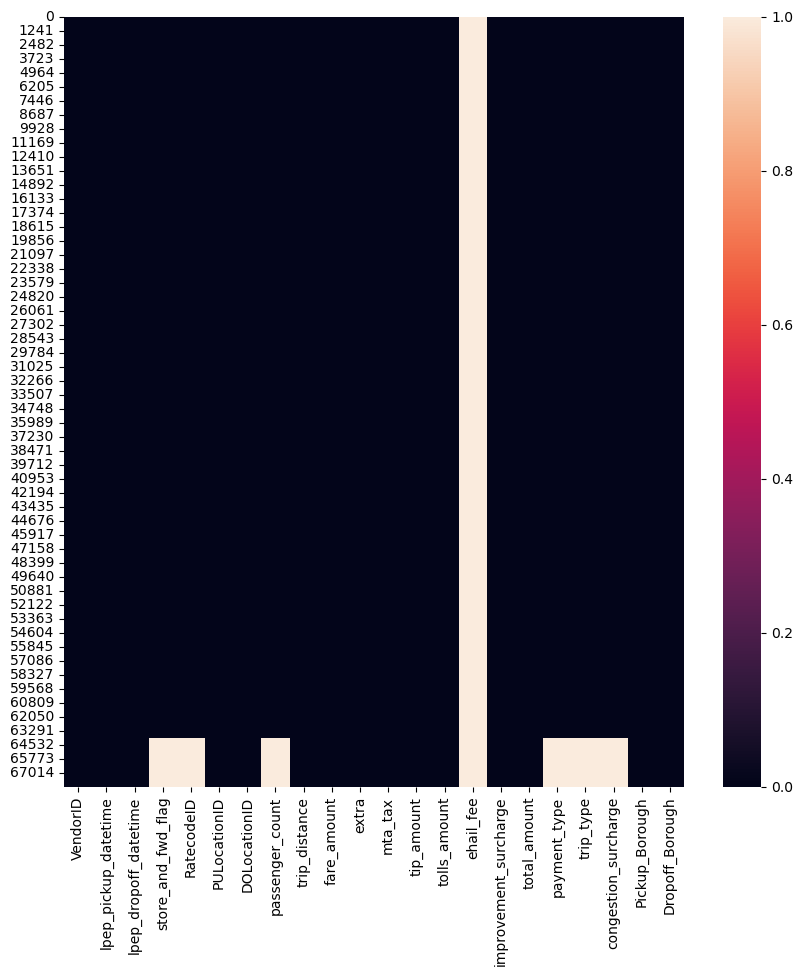

In [11]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','store_and_fwd_flag','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','ehail_fee','improvement_surcharge','total_amount','payment_type','trip_type','congestion_surcharge','Pickup_Borough','Dropoff_Borough']].isna())

Missing value terdapat pada kolom `store_and_fwd_flag, RatecodeID, passenger_count, ehail_fee` dimana:
- pada kolom **ehail_fee** memiliki missing value sebesar 100% dan kolom ini hanya dapat diisi jika mengetahui harganya berdasarkan aplikasi sehingga kolom ini dihapus.
- pada kolom **store_and_fwd_flag**, **RatecodeID**, **passenger_count** memiliki missing value sebesar 6% dan kolom ini hanya dapat diisi oleh driver taxi sehingga kolom ini yang berisi null dihapus.
- pada kolom **PUZone** dan **DOZone** memiliki missing value dan kolom ini disebabkan pada kolom Borough isinya Unknown sehingga kolom ini yang berisi null akan diisi menjadi Unknown sesuai dengan kolom Boroughnya.

In [12]:
df.drop(columns=['ehail_fee'], inplace=True)

In [13]:
df[df['PUZone'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
1009,1,2023-01-01 18:33:47,2023-01-01 19:12:24,N,1.0,265,14,1.0,0.00,57.2,...,0.00,1.0,58.70,1.0,1.0,0.00,Unknown,NaN,Brooklyn,Bay Ridge
2286,1,2023-01-02 17:21:24,2023-01-02 17:24:47,N,1.0,265,265,1.0,0.50,5.1,...,0.00,1.0,6.60,2.0,1.0,0.00,Unknown,NaN,Unknown,NaN
2551,1,2023-01-02 19:41:31,2023-01-02 20:16:51,N,1.0,265,22,1.0,0.00,50.2,...,0.00,1.0,51.70,1.0,1.0,0.00,Unknown,NaN,Brooklyn,Bensonhurst West
3676,2,2023-01-03 13:37:26,2023-01-03 13:50:48,N,1.0,265,265,3.0,0.00,12.1,...,11.75,1.0,25.35,2.0,1.0,0.00,Unknown,NaN,Unknown,NaN
3677,2,2023-01-03 13:54:21,2023-01-03 14:08:09,N,1.0,265,237,1.0,0.00,12.1,...,0.00,1.0,16.35,2.0,1.0,2.75,Unknown,NaN,Manhattan,Upper East Side South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56436,2,2023-01-28 08:43:12,2023-01-28 09:41:59,N,1.0,265,92,1.0,14.72,76.5,...,0.00,1.0,78.00,2.0,1.0,0.00,Unknown,NaN,Queens,Flushing
58293,2,2023-01-29 07:55:12,2023-01-29 09:03:03,N,1.0,265,92,1.0,15.69,87.0,...,0.00,1.0,88.50,2.0,1.0,0.00,Unknown,NaN,Queens,Flushing
58858,1,2023-01-29 14:28:00,2023-01-29 15:14:13,N,1.0,265,14,1.0,0.00,57.2,...,0.00,1.0,58.70,1.0,1.0,0.00,Unknown,NaN,Brooklyn,Bay Ridge
59001,1,2023-01-29 16:04:12,2023-01-29 16:18:04,N,5.0,265,265,1.0,5.20,50.0,...,0.00,0.0,52.00,1.0,2.0,0.00,Unknown,NaN,Unknown,NaN


In [14]:
df[df['DOZone'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
31,2,2023-01-01 00:46:48,2023-01-01 01:08:17,N,4.0,95,265,1.0,10.44,47.10,...,0.00,1.0,59.52,1.0,1.0,0.0,Queens,Forest Hills,Unknown,NaN
457,2,2023-01-01 11:41:18,2023-01-01 12:22:07,N,3.0,65,265,1.0,12.37,74.80,...,13.75,1.0,107.46,1.0,1.0,0.0,Brooklyn,Downtown Brooklyn/MetroTech,Unknown,NaN
933,1,2023-01-01 17:10:55,2023-01-01 17:47:57,N,1.0,14,265,1.0,0.00,57.20,...,0.00,1.0,58.70,1.0,1.0,0.0,Brooklyn,Bay Ridge,Unknown,NaN
1156,2,2023-01-01 20:37:08,2023-01-01 21:04:42,N,1.0,244,265,1.0,15.69,59.70,...,0.00,1.0,74.64,1.0,1.0,0.0,Manhattan,Washington Heights South,Unknown,NaN
1224,2,2023-01-01 21:38:54,2023-01-01 22:04:05,N,1.0,69,265,1.0,11.22,45.00,...,0.00,1.0,47.50,2.0,1.0,0.0,Bronx,East Concourse/Concourse Village,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67311,2,2023-01-25 11:26:00,2023-01-25 11:35:00,NaN,NaN,240,265,NaN,3.87,26.03,...,0.00,1.0,30.03,NaN,NaN,NaN,Bronx,Van Cortlandt Park,Unknown,NaN
67733,2,2023-01-28 07:39:00,2023-01-28 08:30:00,NaN,NaN,89,265,NaN,21.87,97.24,...,19.30,1.0,141.05,NaN,NaN,NaN,Brooklyn,Flatbush/Ditmas Park,Unknown,NaN
67792,2,2023-01-28 16:45:00,2023-01-28 17:39:00,NaN,NaN,49,265,NaN,7.74,36.40,...,14.75,1.0,59.97,NaN,NaN,NaN,Brooklyn,Clinton Hill,Unknown,NaN
67940,2,2023-01-29 21:41:00,2023-01-29 22:13:00,NaN,NaN,175,265,NaN,21.30,82.19,...,6.55,1.0,107.69,NaN,NaN,NaN,Queens,Oakland Gardens,Unknown,NaN


In [15]:
df['PUZone'].fillna('Unknown', inplace=True)
df['DOZone'].fillna('Unknown', inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


## Handling Data Entry Errors

In [18]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,0.626951,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,0.366919,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897


Jika dilihat dari nilai minimal pada kolom `fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount dan congestion_surcharge` merupakan nilai negatif dimana hal ini tidak mungkin dikarenakan kolom-kolom tersebut merupakan kolom yang harus dibayarkan oleh customer sehingga seharusnya bernilai positif. Oleh karena itu perlu dicek kolom-kolom tersebut.

In [19]:
neg_min=df[(df['fare_amount'] < 0) | (df['extra'] < 0) | (df['mta_tax'] < 0) | (df['tip_amount'] < 0) | (df['improvement_surcharge'] < 0) | (df['total_amount'] < 0) | (df['congestion_surcharge'] < 0)]
neg_min

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,...,0.0,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,...,0.0,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Queens,Elmhurst
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,...,0.0,-0.3,-5.3,4.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,...,0.0,-1.0,-5.2,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,...,0.0,-1.0,-7.0,4.0,1.0,0.0,Queens,Jamaica,Queens,Jamaica
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,...,0.0,-1.0,-7.0,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,...,0.0,-0.3,-3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,...,0.0,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)


In [20]:
duplicated_time = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], keep=False)]
duplicated_time

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,51,264,3.0,0.00,40.0,...,0.0,1.0,41.0,1.0,2.0,0.0,Bronx,Co-Op City,Unknown,NV
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,260,264,1.0,0.00,20.0,...,0.0,1.0,25.2,1.0,2.0,0.0,Queens,Woodside,Unknown,NV
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,...,0.0,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,0.0,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,...,0.0,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,...,0.0,0.3,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,...,0.0,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,0.0,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,...,0.0,-1.0,-11.0,4.0,2.0,0.0,Unknown,NV,Unknown,NV


Ketika dilakukan pengecekan terhadap kolom waktu pickup dan dropoff yang duplikat terdapat nilai yang sama pada kolom `fare_amount, extra, mta_tax, improvement_surcharge, total_amount` yang membedakan hanya nilainya ada yang negatif dan ada yang positif. Oleh karena itu data yang bernilai negatif akan diubah menjadi bernilai positif terlebih dahulu kemudian akan didrop apabila nilai tersebut merupakan duplikat.

In [21]:
df[['fare_amount','extra','mta_tax','tip_amount','improvement_surcharge','total_amount','congestion_surcharge']] = df[['fare_amount','extra','mta_tax','tip_amount','improvement_surcharge','total_amount','congestion_surcharge']].abs()

In [22]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.107727,0.885154,0.629534,2.041982,0.144182,0.954459,21.247460,1.373671,1.021933,0.727120
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.236802,1.289661,0.362469,2.998411,1.012740,0.175153,15.065936,0.508058,0.146465,1.212742


Nilai negatif pada kolom `fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount dan congestion_surcharge` sudah tidak ada dan berubah menjadi positif dan sekarang dapat di drop duplicate.

In [23]:
duplicated_rows = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'total_amount'], keep=False)]
duplicated_rows

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,0.0,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,0.0,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,...,0.0,1.0,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,...,0.0,1.0,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,8.6,...,0.0,1.0,11.1,3.0,1.0,0.0,Queens,Jackson Heights,Queens,Elmhurst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,...,0.0,0.3,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,0.0,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,0.0,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,10.0,...,0.0,1.0,11.0,4.0,2.0,0.0,Unknown,NV,Unknown,NV


In [24]:
neg_min.index

Index([  662,   898,  1317,  1686,  1864,  1919,  2481,  3317,  3378,  3407,
       ...
       61102, 61123, 61127, 63211, 63240, 63358, 63544, 63655, 63807, 63868],
      dtype='int64', length=174)

In [25]:
duplicated_rows.index

Index([  662,   663,   898,   899,  1317,  1318,  1686,  1687,  1864,  1865,
       ...
       63358, 63359, 63544, 63545, 63655, 63656, 63807, 63808, 63868, 63869],
      dtype='int64', length=348)

Terdapat 348/2 = 174 baris yang duplikat. Hasil ini sama dengan total nilai negatif pada kolom `fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount dan congestion_surcharge` dan apabila dilihat dari indexnya juga sama sehingga data negatif tersebut memang data duplikat sehingga dapat dihapus data yang merupakan duplikat.

In [26]:
df.drop_duplicates(inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


In [27]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,63703.000000,63703,63703,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000
mean,1.855501,2023-01-16 20:35:50.248277248,2023-01-16 20:53:51.221229312,1.101518,97.692008,138.374723,1.315590,2.583096,16.135061,0.885225,0.629959,2.047321,0.144576,0.954423,21.282180,1.368774,1.021867,0.728977
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:29:11.500000,2023-01-09 12:43:05,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:47:46,2023-01-17 09:03:53,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.460000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:18:24,2023-01-24 16:36:21.500000,1.000000,116.000000,222.000000,1.000000,3.060000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.351597,NaN,NaN,0.619562,60.144885,76.883641,0.979343,6.767790,13.233962,1.290223,0.362826,3.000464,1.014094,0.175223,15.062816,0.499549,0.146251,1.213732


Pada kolom trip_distance nilai minimumnya adalah 0 miles dan nilai maksimumnya adalah 1571.97 miles di mana trip_distance sebesar 0 miles menandakan bahwa taxi tersebut tidak berjalan dan 1571.97 miles juga perlu dicek datanya dengan kolom trip_distance berhubungan dengan kolom PULocationID dan DOLocationID.

In [28]:
df[df['trip_distance']==1571.97]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,...,6.55,1.0,43.31,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North


In [29]:
df[(df["PULocationID"] == 82) & (df["DOLocationID"] == 236)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
313,2,2023-01-01 07:57:54,2023-01-01 08:15:47,N,1.0,82,236,1.0,7.77,33.80,...,0.00,1.0,42.36,1.0,1.0,0.00,Queens,Elmhurst,Manhattan,Upper East Side North
1551,2,2023-01-02 10:58:35,2023-01-02 11:18:10,N,5.0,82,236,1.0,8.22,29.62,...,6.55,1.0,42.93,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North
6770,2,2023-01-04 19:58:39,2023-01-04 20:19:49,N,5.0,82,236,1.0,8.08,28.46,...,6.55,1.0,41.68,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,...,6.55,1.0,43.31,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North


Jika dilihat berdasarkan data di mana kode pickup 82 dan kode dropoff 236 maksimal tripnya sejauh 8.22 miles dan data yang sejauh 1571.97 miles memiliki waktu trip yang hampir sama dengan data yang lainnya sehingga apabila trip_distancenya sejauh 1571.97 tidak mungkin sehingga akan diisi dengan mean dari ketiga data yang lain dengan kode pickup 82 dan kode dropoff 236.

In [30]:
mean_distance = df[(df["PULocationID"] == 82) & (df["DOLocationID"] == 236) & (df["trip_distance"] != 1571.97)]["trip_distance"].mean()
df.loc[df["trip_distance"] == 1571.97, "trip_distance"] = mean_distance

In [31]:
df[(df["PULocationID"] == 82) & (df["DOLocationID"] == 236)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
313,2,2023-01-01 07:57:54,2023-01-01 08:15:47,N,1.0,82,236,1.0,7.770000,33.80,...,0.00,1.0,42.36,1.0,1.0,0.00,Queens,Elmhurst,Manhattan,Upper East Side North
1551,2,2023-01-02 10:58:35,2023-01-02 11:18:10,N,5.0,82,236,1.0,8.220000,29.62,...,6.55,1.0,42.93,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North
6770,2,2023-01-04 19:58:39,2023-01-04 20:19:49,N,5.0,82,236,1.0,8.080000,28.46,...,6.55,1.0,41.68,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,8.023333,29.97,...,6.55,1.0,43.31,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North


In [32]:
trip_sorted = df.sort_values(by='trip_distance', ascending=False)
trip_sorted

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,N,5.0,134,134,1.0,66.18,15.00,...,0.00,1.0,18.75,2.0,1.0,2.75,Queens,Kew Gardens,Queens,Kew Gardens
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,N,1.0,82,265,1.0,57.09,205.30,...,0.00,1.0,206.80,2.0,1.0,0.00,Queens,Elmhurst,Unknown,Unknown
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,N,5.0,179,264,4.0,53.72,0.01,...,0.00,1.0,3.76,2.0,1.0,2.75,Queens,Old Astoria,Unknown,NV
30501,2,2023-01-16 11:21:23,2023-01-16 12:07:33,N,5.0,175,265,1.0,48.70,140.00,...,0.00,1.0,141.10,1.0,2.0,0.00,Queens,Oakland Gardens,Unknown,Unknown
62314,2,2023-01-31 11:26:06,2023-01-31 12:19:14,N,4.0,130,265,1.0,48.19,258.50,...,0.00,1.0,260.00,2.0,1.0,0.00,Queens,Jamaica,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,1,2023-01-10 05:45:46,2023-01-10 06:02:47,N,1.0,20,140,1.0,0.00,34.50,...,6.55,1.0,42.55,1.0,1.0,0.00,Bronx,Belmont,Manhattan,Lenox Hill East
23704,1,2023-01-12 18:19:15,2023-01-12 18:22:48,N,1.0,55,55,1.0,0.00,15.20,...,0.00,1.0,16.70,1.0,1.0,0.00,Brooklyn,Coney Island,Brooklyn,Coney Island
17386,1,2023-01-10 03:57:26,2023-01-10 04:15:45,N,1.0,53,74,1.0,0.00,33.50,...,6.55,1.0,41.55,1.0,1.0,0.00,Queens,College Point,Manhattan,East Harlem North
41815,2,2023-01-21 16:33:59,2023-01-21 16:49:12,N,1.0,95,196,2.0,0.00,13.50,...,0.00,1.0,15.00,2.0,1.0,0.00,Queens,Forest Hills,Queens,Rego Park


Selanjutnya data akan difilter untuk drop trip_distance yang senilai 0 karena diperkirakan taxi tersebut tidak berjalan.

In [33]:
df[df['trip_distance']==0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.2,...,0.0,1.0,11.64,1.0,1.0,0.0,Queens,Steinway,Queens,Old Astoria
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.4,...,0.0,1.0,8.28,1.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.0,...,0.0,1.0,21.00,1.0,2.0,0.0,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.0,...,0.0,1.0,14.50,1.0,1.0,0.0,Queens,Astoria,Queens,Astoria
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.0,3.0,...,0.0,0.3,26.30,1.0,1.0,0.0,Unknown,NV,Unknown,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63756,2,2023-01-31 21:56:14,2023-01-31 21:56:16,N,5.0,97,264,1.0,0.0,12.0,...,0.0,1.0,13.00,1.0,2.0,0.0,Brooklyn,Fort Greene,Unknown,NV
63798,2,2023-01-31 22:19:41,2023-01-31 22:27:59,N,1.0,42,152,1.0,0.0,8.6,...,0.0,1.0,11.10,2.0,1.0,0.0,Manhattan,Central Harlem North,Manhattan,Manhattanville
63813,2,2023-01-31 22:29:03,2023-01-31 22:35:11,N,1.0,95,95,2.0,0.0,7.2,...,0.0,1.0,9.70,2.0,1.0,0.0,Queens,Forest Hills,Queens,Forest Hills
63833,2,2023-01-31 22:43:19,2023-01-31 22:46:09,N,5.0,130,130,1.0,0.0,10.0,...,0.0,1.0,11.00,2.0,2.0,0.0,Queens,Jamaica,Queens,Jamaica


Data yang trip_distance bernilai 0 akan di drop dikarenakan seharusnya dengan adanya penumpang menandakan taksi itu akan berjalan sehingga harusnya trip_distancenya > 0.00

In [34]:
df=df.loc[df['trip_distance']>0]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


In [35]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,60575.000000,60575,60575,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000,60575.000000
mean,1.872604,2023-01-16 20:58:11.577746688,2023-01-16 21:16:11.433859072,1.069369,96.555972,138.152092,1.325068,2.690665,15.921351,0.914660,0.618019,2.103575,0.130691,0.955355,21.171292,1.370846,1.014148,0.759492
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:37:29.500000,2023-01-09 12:53:10.500000,1.000000,74.000000,74.000000,1.000000,1.200000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.750000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 09:20:44,2023-01-17 09:38:11,1.000000,75.000000,138.000000,1.000000,1.890000,12.800000,0.000000,0.500000,1.620000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:30:29,2023-01-24 16:48:03.500000,1.000000,112.000000,223.000000,1.000000,3.160000,19.100000,2.500000,0.500000,3.280000,0.000000,1.000000,25.350000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,8.000000,66.180000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000
std,0.333419,NaN,NaN,0.512087,58.849328,76.611510,0.992444,2.674317,12.164222,1.303122,0.340496,2.954881,0.962859,0.172178,14.188285,0.495719,0.118101,1.229486


Jika dilihat dari data di atas masih terdapat beberapa kesalahan data entry seperti `passenger_count,fare_amount,total_amount,mta_tax` tidak mungkin bernilai 0 kecuali untuk `fare_amount` yang `payment_type` nya memiliki kode 3 yang artinya tidak ada biaya.`fare_amount` di New York City minimal seharga $3.00 saat buka pintu. Selain itu untuk `passenger_count` di NYC memiliki persyaratan bahwa maksimal empat (4) dalam taksi empat (4) penumpang atau lima (5) penumpang dalam taksi lima (5) penumpang, kecuali penumpang tambahan harus diterima jika demikian. penumpang berusia di bawah tujuh (7) tahun dan digendong di pangkuan penumpang dewasa yang duduk di belakang sehingga bisa dikatakan maksimal 6 orang. Oleh karena itu data tersebut akan didrop jika tidak memenuhi kriteria tersebut.

In [36]:
df[(df["total_amount"] == 0) & (df["payment_type"] == 3)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
51901,1,2023-01-26 10:50:42,2023-01-26 10:51:30,N,5.0,41,75,2.0,0.1,0.0,...,0.0,0.0,0.0,3.0,2.0,0.0,Manhattan,Central Harlem,Manhattan,East Harlem South


In [37]:
df.drop(df[(df['total_amount'] == 0) & (df['payment_type'] != 3)].index, inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


In [38]:
df.drop(df[(df['fare_amount'] < 3) & (df['payment_type'] != 3)].index, inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Queens,Saint Albans
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


In [39]:
df = df.loc[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
df=df.loc[df['mta_tax']>0]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63881,2,2023-01-31 23:29:10,2023-01-31 23:38:21,N,1.0,74,116,3.0,2.00,12.1,...,0.0,1.0,17.52,1.0,1.0,0.00,Manhattan,East Harlem North,Manhattan,Hamilton Heights
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North


Setelah dibersihkan serta memfilter data yang lebih relevan dengan realita maka sekarang kita memiliki 59308 baris dari 68211 baris.

## Insert Columns

Menambahkan kolom **lpep_trip_datetime** untuk mengetahui berapa lama perjalanan pada setiap trip yang dilakukan penumpang taxi.

In [40]:
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

In [41]:
df['lpep_trip_datetime'] = df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]
df['lpep_trip_datetime'] = df["lpep_trip_datetime"].dt.components['minutes']
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,11
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,6
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,5
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,5
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63881,2,2023-01-31 23:29:10,2023-01-31 23:38:21,N,1.0,74,116,3.0,2.00,12.1,...,1.0,17.52,1.0,1.0,0.00,Manhattan,East Harlem North,Manhattan,Hamilton Heights,9
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Park Slope,10
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Manhattan,Hamilton Heights,6
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Upper West Side North,9


In [42]:
value_counts_sorted = df['lpep_trip_datetime'].value_counts().sort_index()
print(value_counts_sorted)

lpep_trip_datetime
0      294
1      441
2     1060
3     1905
4     2792
5     3370
6     3812
7     4020
8     3955
9     3831
10    3712
11    3406
12    3274
13    2911
14    2437
15    2126
16    1876
17    1671
18    1505
19    1219
20    1145
21     983
22     862
23     740
24     636
25     610
26     561
27     453
28     432
29     361
30     336
31     269
32     251
33     250
34     203
35     173
36     135
37     140
38     112
39      94
40      91
41      99
42      68
43      61
44      72
45      53
46      54
47      55
48      59
49      39
50      32
51      34
52      31
53      30
54      24
55      35
56      26
57      26
58      32
59      24
Name: count, dtype: int64


Di kolom **lpep_trip_datetime** ditemukan adanya lama perjalanan yang terlalu lama sehingga untuk mencari insight maka akan dibatasi lama perjalanan maksimal 3 jam.

In [43]:
df=df.loc[df['lpep_trip_datetime']<4]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.70,3.0,...,1.0,5.50,3.0,1.0,0.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,0
57,2,2023-01-01 00:06:48,2023-01-01 01:08:47,N,1.0,129,226,2.0,7.83,52.0,...,1.0,54.50,2.0,1.0,0.0,Queens,Jackson Heights,Queens,Sunnyside,1
62,2,2023-01-01 00:44:41,2023-01-01 00:48:26,N,1.0,42,168,1.0,1.26,7.2,...,1.0,9.70,2.0,1.0,0.0,Manhattan,Central Harlem North,Bronx,Mott Haven/Port Morris,3
70,1,2023-01-01 01:22:35,2023-01-01 01:25:11,N,1.0,42,116,1.0,0.60,5.1,...,1.0,7.60,2.0,1.0,0.0,Manhattan,Central Harlem North,Manhattan,Hamilton Heights,2
82,2,2023-01-01 01:03:59,2023-01-01 01:07:17,N,1.0,75,74,1.0,0.53,5.8,...,1.0,8.30,2.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,1.0,6.20,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side),1
63835,2,2023-01-31 22:59:41,2023-01-31 23:03:18,N,1.0,82,56,1.0,0.40,5.8,...,1.0,8.30,1.0,1.0,0.0,Queens,Elmhurst,Queens,Corona,3
63863,2,2023-01-31 23:43:59,2023-01-31 23:47:22,N,1.0,7,7,1.0,0.72,5.8,...,1.0,9.13,1.0,1.0,0.0,Queens,Astoria,Queens,Astoria,3
63874,2,2023-01-31 23:37:01,2023-01-31 23:40:38,N,1.0,129,260,2.0,0.91,6.5,...,1.0,9.00,2.0,1.0,0.0,Queens,Jackson Heights,Queens,Woodside,3


menambahkan kolom **PUHour** untuk mengisi info jam berapa pickup penumpang dan kolom **DOHour** untuk mengisi info jam berapa dropoff penumpang.

In [44]:
df["PUHour"] = pd.to_datetime(df["lpep_pickup_datetime"]).dt.hour
df["DOHour"] = pd.to_datetime(df["lpep_dropoff_datetime"]).dt.hour

menambahkan kolom **total_payment** untuk melakukan pengecekan terhadap kolom **total_amount** apakah hasilnya sudah sesuai dari penjumlahan kolom `fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge` ?

In [45]:
df['total_payment'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']+df['congestion_surcharge']
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,PUHour,DOHour,total_payment
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.70,3.0,...,1.0,0.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,0,0,0,6.50
57,2,2023-01-01 00:06:48,2023-01-01 01:08:47,N,1.0,129,226,2.0,7.83,52.0,...,1.0,0.0,Queens,Jackson Heights,Queens,Sunnyside,1,0,1,54.50
62,2,2023-01-01 00:44:41,2023-01-01 00:48:26,N,1.0,42,168,1.0,1.26,7.2,...,1.0,0.0,Manhattan,Central Harlem North,Bronx,Mott Haven/Port Morris,3,0,0,9.70
70,1,2023-01-01 01:22:35,2023-01-01 01:25:11,N,1.0,42,116,1.0,0.60,5.1,...,1.0,0.0,Manhattan,Central Harlem North,Manhattan,Hamilton Heights,2,1,1,8.60
82,2,2023-01-01 01:03:59,2023-01-01 01:07:17,N,1.0,75,74,1.0,0.53,5.8,...,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North,3,1,1,8.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side),1,22,22,6.20
63835,2,2023-01-31 22:59:41,2023-01-31 23:03:18,N,1.0,82,56,1.0,0.40,5.8,...,1.0,0.0,Queens,Elmhurst,Queens,Corona,3,22,23,8.30
63863,2,2023-01-31 23:43:59,2023-01-31 23:47:22,N,1.0,7,7,1.0,0.72,5.8,...,1.0,0.0,Queens,Astoria,Queens,Astoria,3,23,23,9.13
63874,2,2023-01-31 23:37:01,2023-01-31 23:40:38,N,1.0,129,260,2.0,0.91,6.5,...,1.0,0.0,Queens,Jackson Heights,Queens,Woodside,3,23,23,9.00


In [46]:
df1=df[['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount', 'total_payment']]
df1

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,total_payment
35,3.0,1.0,1.5,0.00,0.0,1.0,0.0,5.50,6.50
57,52.0,1.0,0.5,0.00,0.0,1.0,0.0,54.50,54.50
62,7.2,1.0,0.5,0.00,0.0,1.0,0.0,9.70,9.70
70,5.1,1.0,1.5,0.00,0.0,1.0,0.0,7.60,8.60
82,5.8,1.0,0.5,0.00,0.0,1.0,0.0,8.30,8.30
...,...,...,...,...,...,...,...,...,...
63807,3.7,1.0,0.5,0.00,0.0,1.0,0.0,6.20,6.20
63835,5.8,1.0,0.5,0.00,0.0,1.0,0.0,8.30,8.30
63863,5.8,1.0,0.5,0.83,0.0,1.0,0.0,9.13,9.13
63874,6.5,1.0,0.5,0.00,0.0,1.0,0.0,9.00,9.00


In [47]:
df1['equal'] = df1['total_amount'] == df1['total_payment']
df1

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,total_payment,equal
35,3.0,1.0,1.5,0.00,0.0,1.0,0.0,5.50,6.50,False
57,52.0,1.0,0.5,0.00,0.0,1.0,0.0,54.50,54.50,True
62,7.2,1.0,0.5,0.00,0.0,1.0,0.0,9.70,9.70,True
70,5.1,1.0,1.5,0.00,0.0,1.0,0.0,7.60,8.60,False
82,5.8,1.0,0.5,0.00,0.0,1.0,0.0,8.30,8.30,True
...,...,...,...,...,...,...,...,...,...,...
63807,3.7,1.0,0.5,0.00,0.0,1.0,0.0,6.20,6.20,True
63835,5.8,1.0,0.5,0.00,0.0,1.0,0.0,8.30,8.30,True
63863,5.8,1.0,0.5,0.83,0.0,1.0,0.0,9.13,9.13,False
63874,6.5,1.0,0.5,0.00,0.0,1.0,0.0,9.00,9.00,True


In [48]:
equal_counts = df1['equal'].value_counts().sort_index()
print(equal_counts)

equal
False     771
True     2929
Name: count, dtype: int64


masih terdapat 12542 data yang tidak sesuai hasilnya sehingga untuk analisis selanjutnya akan digunakan kolom **total_payment**

In [49]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,lpep_trip_datetime,PUHour,DOHour,total_payment
count,3700.000000,3700,3700,3700.00000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,...,3700.000000,3700.000000,3700.000000,3700.000000,3700.0,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000
mean,1.868649,2023-01-16 16:01:05.307026944,2023-01-16 16:06:09.227026944,1.01973,93.998919,107.770811,1.319730,0.742732,6.218811,0.766149,...,0.018365,0.955486,9.508562,1.545946,1.0,0.192500,2.236757,13.850811,13.844595,9.658373
min,1.000000,2023-01-01 00:06:48,2023-01-01 00:41:58,1.00000,7.000000,7.000000,1.000000,0.010000,2.500000,0.000000,...,0.000000,0.000000,3.500000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,3.500000
25%,2.000000,2023-01-09 07:23:42.750000128,2023-01-09 07:27:11.249999872,1.00000,43.000000,42.000000,1.000000,0.400000,4.400000,0.000000,...,0.000000,1.000000,6.900000,1.000000,1.0,0.000000,2.000000,10.000000,10.000000,7.080000
50%,2.000000,2023-01-16 19:32:53.500000,2023-01-16 19:36:42.500000,1.00000,75.000000,75.000000,1.000000,0.570000,5.100000,0.000000,...,0.000000,1.000000,8.300000,2.000000,1.0,0.000000,3.000000,15.000000,15.000000,8.300000
75%,2.000000,2023-01-24 08:22:06.750000128,2023-01-24 08:24:32.249999872,1.00000,129.000000,166.000000,1.000000,0.750000,5.800000,1.000000,...,0.000000,1.000000,9.800000,2.000000,1.0,0.000000,3.000000,18.000000,18.000000,9.960000
max,2.000000,2023-01-31 23:43:59,2023-01-31 23:47:22,5.00000,265.000000,265.000000,6.000000,35.390000,208.800000,12.500000,...,6.550000,1.000000,211.300000,4.000000,1.0,2.750000,3.000000,23.000000,23.000000,211.300000
std,0.337830,NaN,NaN,0.24252,60.596847,72.695935,0.999156,1.540665,8.073409,1.033580,...,0.342446,0.171549,9.096414,0.594921,0.0,0.701749,0.946615,5.665537,5.705336,9.093255


In [50]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,PUHour,DOHour,total_payment
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.70,3.0,...,1.0,0.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,0,0,0,6.50
57,2,2023-01-01 00:06:48,2023-01-01 01:08:47,N,1.0,129,226,2.0,7.83,52.0,...,1.0,0.0,Queens,Jackson Heights,Queens,Sunnyside,1,0,1,54.50
62,2,2023-01-01 00:44:41,2023-01-01 00:48:26,N,1.0,42,168,1.0,1.26,7.2,...,1.0,0.0,Manhattan,Central Harlem North,Bronx,Mott Haven/Port Morris,3,0,0,9.70
70,1,2023-01-01 01:22:35,2023-01-01 01:25:11,N,1.0,42,116,1.0,0.60,5.1,...,1.0,0.0,Manhattan,Central Harlem North,Manhattan,Hamilton Heights,2,1,1,8.60
82,2,2023-01-01 01:03:59,2023-01-01 01:07:17,N,1.0,75,74,1.0,0.53,5.8,...,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North,3,1,1,8.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,1.0,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side),1,22,22,6.20
63835,2,2023-01-31 22:59:41,2023-01-31 23:03:18,N,1.0,82,56,1.0,0.40,5.8,...,1.0,0.0,Queens,Elmhurst,Queens,Corona,3,22,23,8.30
63863,2,2023-01-31 23:43:59,2023-01-31 23:47:22,N,1.0,7,7,1.0,0.72,5.8,...,1.0,0.0,Queens,Astoria,Queens,Astoria,3,23,23,9.13
63874,2,2023-01-31 23:37:01,2023-01-31 23:40:38,N,1.0,129,260,2.0,0.91,6.5,...,1.0,0.0,Queens,Jackson Heights,Queens,Woodside,3,23,23,9.00


In [51]:
df['PUday'] = df['lpep_pickup_datetime'].dt.day_name()
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,Pickup_Borough,PUZone,Dropoff_Borough,DOZone,lpep_trip_datetime,PUHour,DOHour,total_payment,PUday
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.70,3.0,...,0.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,0,0,0,6.50,Sunday
57,2,2023-01-01 00:06:48,2023-01-01 01:08:47,N,1.0,129,226,2.0,7.83,52.0,...,0.0,Queens,Jackson Heights,Queens,Sunnyside,1,0,1,54.50,Sunday
62,2,2023-01-01 00:44:41,2023-01-01 00:48:26,N,1.0,42,168,1.0,1.26,7.2,...,0.0,Manhattan,Central Harlem North,Bronx,Mott Haven/Port Morris,3,0,0,9.70,Sunday
70,1,2023-01-01 01:22:35,2023-01-01 01:25:11,N,1.0,42,116,1.0,0.60,5.1,...,0.0,Manhattan,Central Harlem North,Manhattan,Hamilton Heights,2,1,1,8.60,Sunday
82,2,2023-01-01 01:03:59,2023-01-01 01:07:17,N,1.0,75,74,1.0,0.53,5.8,...,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North,3,1,1,8.30,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,0.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side),1,22,22,6.20,Tuesday
63835,2,2023-01-31 22:59:41,2023-01-31 23:03:18,N,1.0,82,56,1.0,0.40,5.8,...,0.0,Queens,Elmhurst,Queens,Corona,3,22,23,8.30,Tuesday
63863,2,2023-01-31 23:43:59,2023-01-31 23:47:22,N,1.0,7,7,1.0,0.72,5.8,...,0.0,Queens,Astoria,Queens,Astoria,3,23,23,9.13,Tuesday
63874,2,2023-01-31 23:37:01,2023-01-31 23:40:38,N,1.0,129,260,2.0,0.91,6.5,...,0.0,Queens,Jackson Heights,Queens,Woodside,3,23,23,9.00,Tuesday


# Analisis Data

Kita sudah melakukan cleaning data dan menambahkan kolom yang dirasa dapat untuk menambah insight kemudian kita akan mencari tahu bagaimana cara meningkatkan profit perusahaan.

##  Metode Pembayaran yang Digunakan

In [101]:
df.groupby(['payment_type'])['fare_amount'].mean()

payment_type
1.0    6.247998
2.0    6.318341
3.0    4.875893
4.0    3.578571
Name: fare_amount, dtype: float64

In [220]:
payment_type_counts = df['payment_type'].value_counts().sort_values(ascending=False)
payment_type_counts

payment_type
Credit card    1848
Cash           1711
No charge       112
Dispute          28
Name: count, dtype: int64

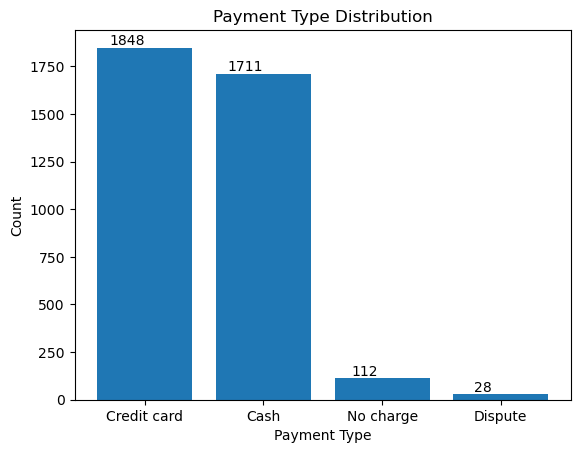

In [207]:
# Mengubah data index
new_index = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}
payment_type_counts = payment_type_counts.rename(index=new_index)

# Membuat bar chart
bars = plt.bar(payment_type_counts.index, payment_type_counts.values)

# Menambahkan label pada setiap batang
for bar, label in zip(bars, payment_type_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, str(label), ha='center', va='bottom')

# Menambahkan judul dan label pada sumbu-sumbu
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')

# Menampilkan bar chart
plt.show()

Berdasarkan visualisasi tersebut, dapat dilihat bahwa customer yang melakukan pembayaran dengan kartu kredit lebih banyak dibandingkan dengan pembayaran lainnya. Melalui hal tersebut dapat disimpulkan bahwa customer lebih memilih untuk menggunakan tipe pembayaran yang lebih mudah dibandingkan dengan metode konvensional yaitu dengan uang tunai.

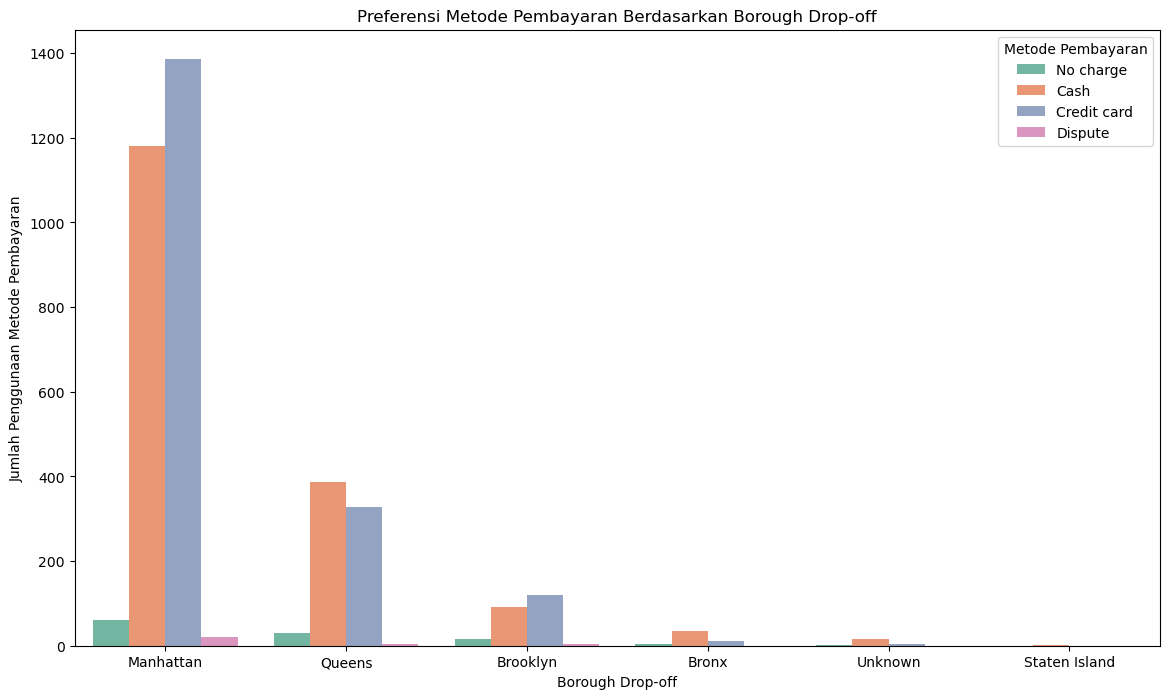

In [328]:
# Membuat plot untuk preferensi metode pembayaran berdasarkan lokasi (Dropoff_Borough)
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Dropoff_Borough', hue='payment_type', palette='Set2', order=df['Dropoff_Borough'].value_counts().index)
plt.title('Preferensi Metode Pembayaran Berdasarkan Borough Drop-off')
plt.xlabel('Borough Drop-off')
plt.ylabel('Jumlah Penggunaan Metode Pembayaran')
plt.legend(title='Metode Pembayaran')
plt.show()

# Membuat plot untuk preferensi metode pembayaran berdasarkan DOZone
# plt.figure(figsize=(14, 8))
# sns.countplot(data=df, x='DOZone', hue='payment_type', palette='Set2', order=df['DOZone'].value_counts().index)
# plt.title('Preferensi Metode Pembayaran Berdasarkan DOZone')
# plt.xlabel('DOZone')
# plt.ylabel('Jumlah Penggunaan Metode Pembayaran')
# plt.legend(title='Metode Pembayaran')
# plt.xticks(rotation=90)
# plt.show()

Visualisasi ini menggambarkan bahwa penggunaan kartu kredit untuk melakukan pembayaran lebih tinggi dibandingkan dengan uang tunai di Manhattan. Sedangkan di Queens masih lebih banyak customer yang melakukan pembayaran dengan uang tunai. 

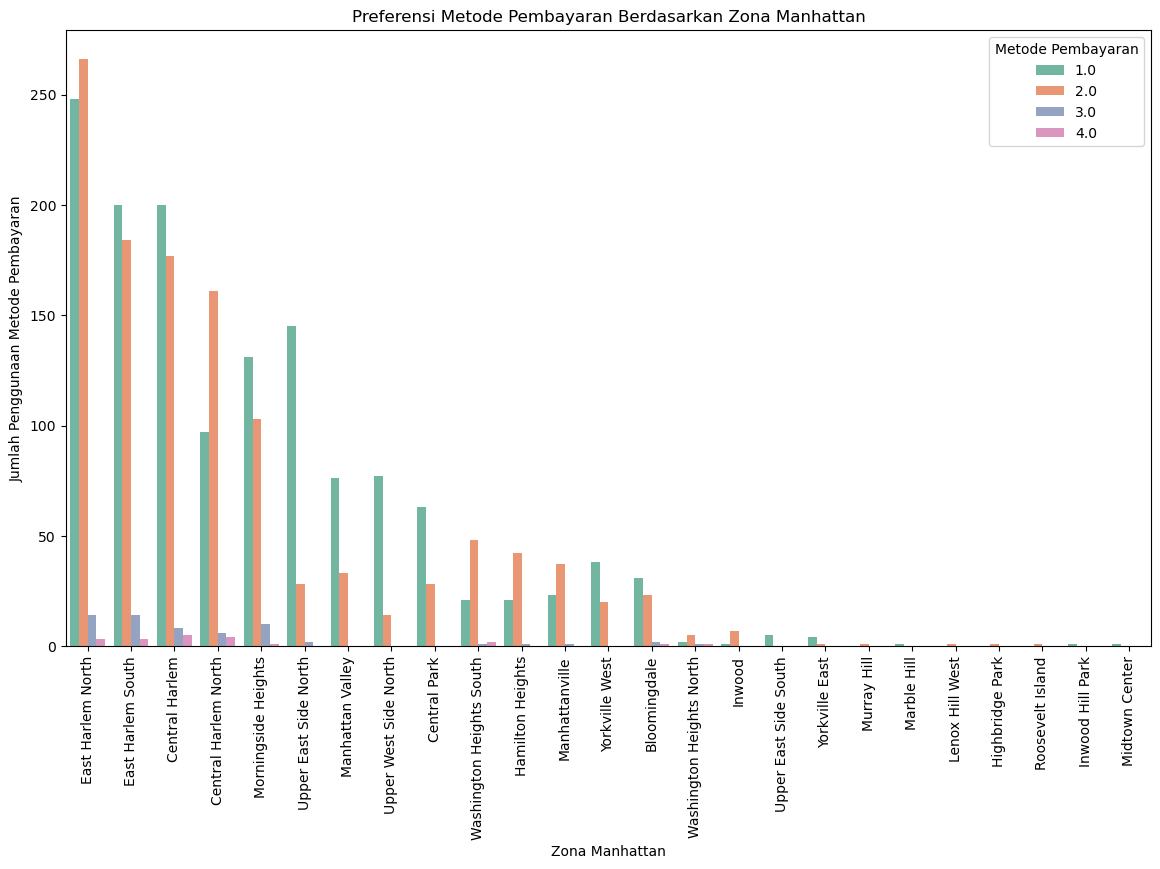

In [203]:
plt.figure(figsize=(14, 8))
manhattan_zones = df[df['Dropoff_Borough'] == 'Manhattan']['DOZone']
sns.countplot(data=df[df['DOZone'].isin(manhattan_zones)], x='DOZone', hue='payment_type', palette='Set2', order=manhattan_zones.value_counts().index)
plt.title('Preferensi Metode Pembayaran Berdasarkan Zona Manhattan')
plt.xlabel('Zona Manhattan')
plt.ylabel('Jumlah Penggunaan Metode Pembayaran')
plt.legend(title='Metode Pembayaran')
plt.xticks(rotation=90)
plt.show()

Berikut visualisasi lebih terperinci dari preferensi metode pembayaran di Manhattan berdasarkan zona-zona tertentu. Namun dapat dilihat bahwa penggunaan metode pembayaran 3 & 4 yakni `Dispute` dan `No Charge` akan kita eliminasi untuk mendapatkan masukkan karena perbandingannya terlalu jauh.

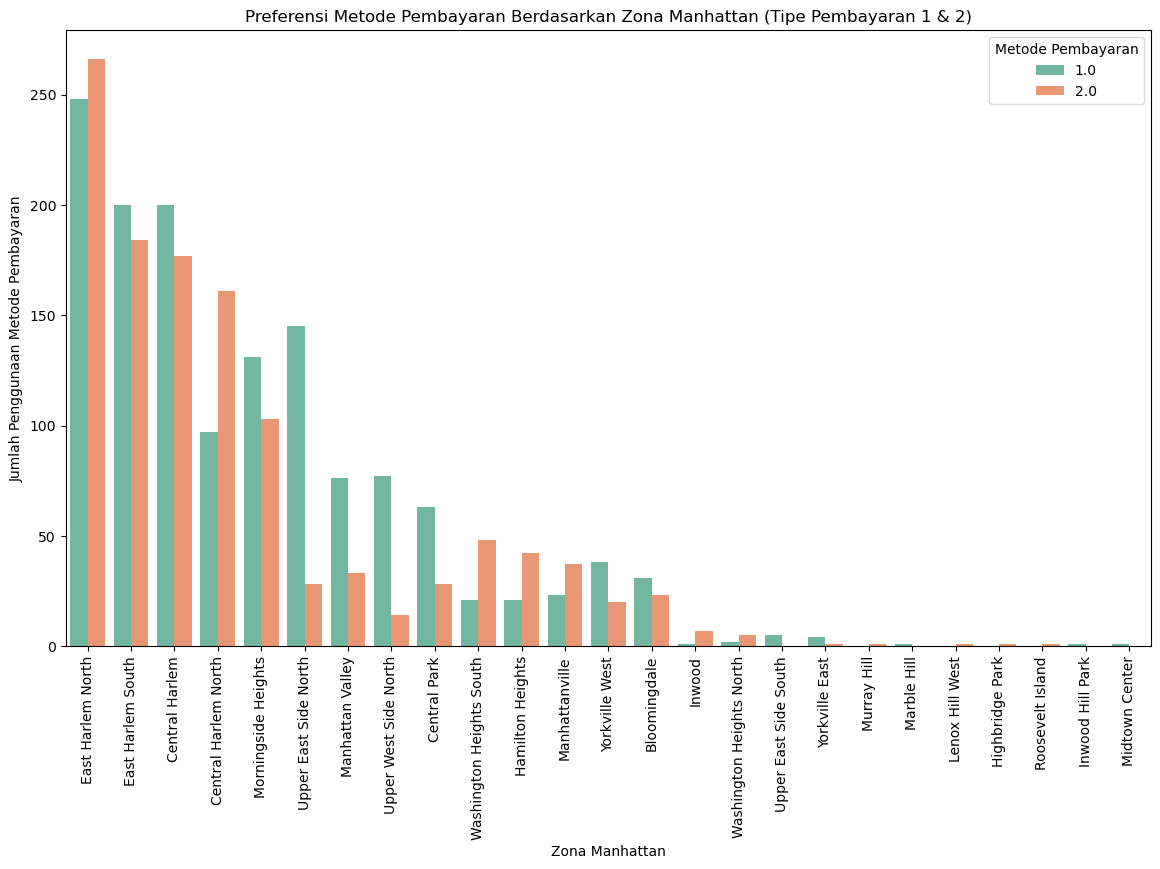

In [204]:
plt.figure(figsize=(14, 8))

# Filter DataFrame untuk hanya tipe pembayaran 1 dan 2 di zona Manhattan
manhattan_payments = df[(df['Dropoff_Borough'] == 'Manhattan') & (df['payment_type'].isin([1, 2]))]

# Buat countplot
sns.countplot(data=manhattan_payments, x='DOZone', hue='payment_type', palette='Set2', order=manhattan_payments['DOZone'].value_counts().index)

# Atur judul dan label
plt.title('Preferensi Metode Pembayaran Berdasarkan Zona Manhattan (Tipe Pembayaran 1 & 2)')
plt.xlabel('Zona Manhattan')
plt.ylabel('Jumlah Penggunaan Metode Pembayaran')
plt.legend(title='Metode Pembayaran')
plt.xticks(rotation=90)
plt.show()

Berikut tampilannya setelah mengeliminasi kedua metode pembayaran tersebut

## Titik Penjemputan Pada Jam Sibuk atau 'Rush Hour'

In [56]:
pickup_counts = df['Pickup_Borough'].value_counts().reset_index()
pickup_order = pickup_counts.index
pickup_counts

,Pickup_Borough,count
0,Manhattan,2669
1,Queens,744
2,Brooklyn,236
3,Bronx,44
4,Unknown,6
5,Staten Island,1


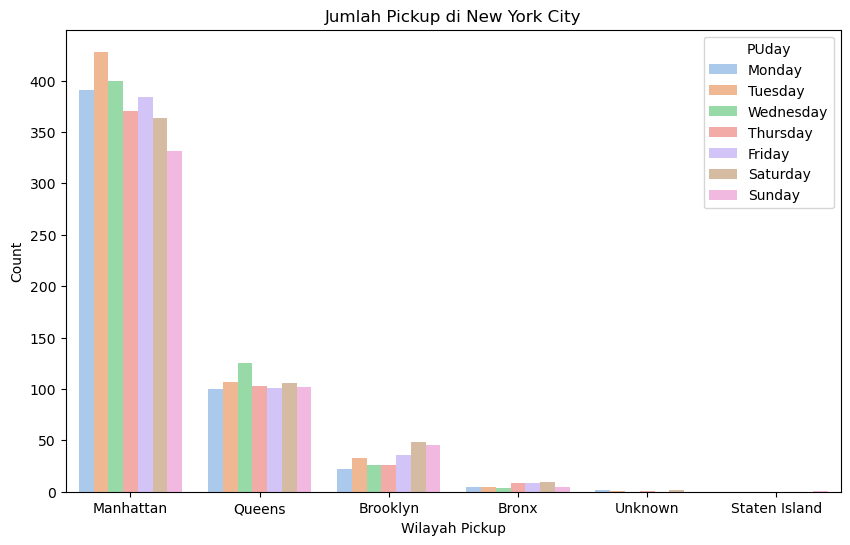

In [273]:
pickup_counts = df['Pickup_Borough'].value_counts()

# Urutkan berdasarkan jumlah penjemputan
pickup_counts_sorted = pickup_counts.sort_values(ascending=False)

# Buat plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pickup_Borough', hue='PUday', hue_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel', order=pickup_counts_sorted.index)
plt.title('Jumlah Pickup di New York City')
plt.xlabel('Wilayah Pickup')
plt.ylabel('Count')
plt.show()

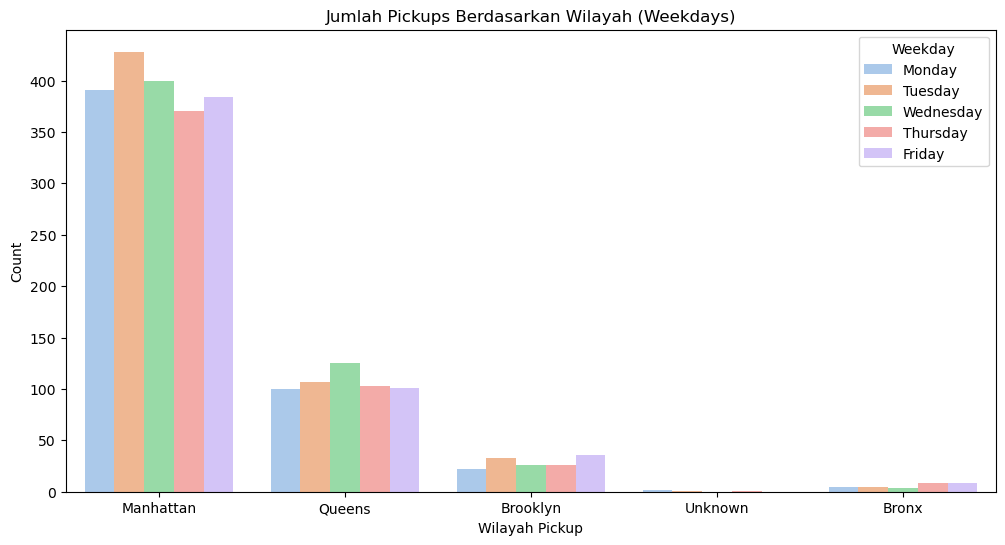

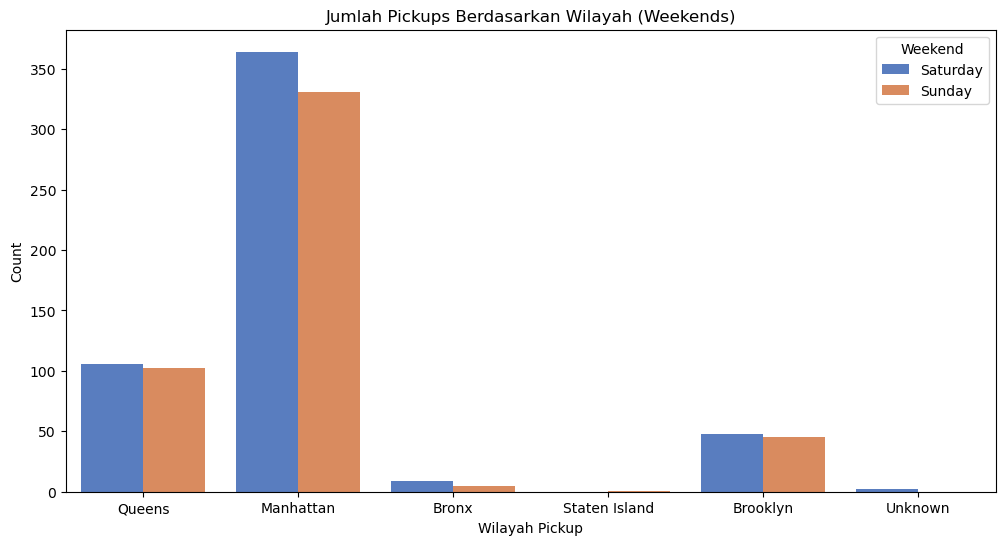

In [171]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_weekdays, x='Pickup_Borough', hue='PUday', hue_order=weekdays, palette='pastel')
plt.title('Jumlah Pickups Berdasarkan Wilayah (Weekdays)')
plt.xlabel('Wilayah Pickup')
plt.ylabel('Count')
plt.legend(title='Weekday')
plt.show()

# Plot untuk weekends
plt.figure(figsize=(12, 6))
sns.countplot(data=df_weekends, x='Pickup_Borough', hue='PUday', hue_order=weekends, palette='muted')
plt.title('Jumlah Pickups Berdasarkan Wilayah (Weekends)')
plt.xlabel('Wilayah Pickup')
plt.ylabel('Count')
plt.legend(title='Weekend')
plt.show()

Untuk dapat melihat titik penjemputan dengan permintaan yang tinggi, pertama akan dibagi terlebih dahulu menjadi hari kerja dan akhir pekan.

Berikut tampilannya setelah dibagi lalu divisualisasikan dengan Plot untuk dapat analisa. Terlihat bahwa jumlah penjemputan paling tinggi ada pada 'weekdays' atau hari kerja. Hal ini dapat disimpulkan bahwa banyaknya jumlah penjemputan pada hari kerja terjadi pada jam-jam sibuk atau 'rush hour', sehingga permintaan taksi meningkat jam tersebut, terutama di Manhattan.

In [58]:
pu_counts = df['Pickup_Borough'].value_counts().sort_index()
pu_counts

Pickup_Borough
Bronx              44
Brooklyn          236
Manhattan        2669
Queens            744
Staten Island       1
Unknown             6
Name: count, dtype: int64

In [281]:
manhattan = df[df['Pickup_Borough'] == 'Manhattan']
top10_man = manhattan['PUZone'].value_counts().head(10).index.tolist()
top10_man

['East Harlem South',
 'East Harlem North',
 'Central Harlem',
 'Morningside Heights',
 'Central Harlem North',
 'Central Park',
 'Washington Heights South',
 'Hamilton Heights',
 'Bloomingdale',
 'Upper East Side North']

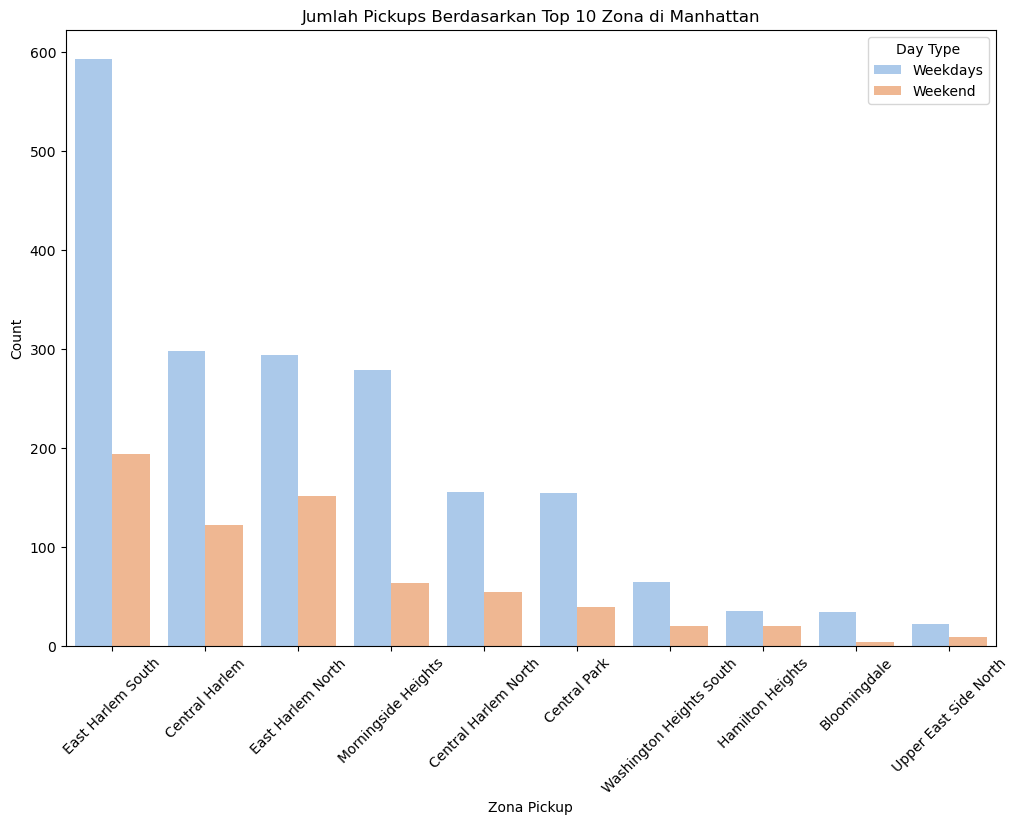

In [283]:
# Tambahkan kolom baru 'Day_Type' untuk menandai weekdays dan weekends
manhattan['Day_Type'] = np.where(manhattan['PUday'].isin(weekdays),'Weekdays','Weekend')
manhattan1=manhattan[manhattan['PUZone'].isin(top10_man)].groupby(['PUZone','Day_Type'])['VendorID'].count().reset_index().sort_values('VendorID',ascending=False)

# Buat plot
plt.figure(figsize=(12, 8))
sns.barplot(data=manhattan1, x='PUZone',y='VendorID', hue='Day_Type',  palette='pastel')
plt.title('Jumlah Pickups Berdasarkan Top 10 Zona di Manhattan')
plt.xlabel('Zona Pickup')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.show()


Melalui visualisasi berikut, East Harlem South menjadi zona yang paling banyak menyumbang jumlah penjemputan paling banyak di wilayah Manhattan.

In [181]:
pickup_time = df[['VendorID','lpep_pickup_datetime']].groupby('lpep_pickup_datetime').count().sort_values('VendorID', ascending=False).reset_index()
pickup_time['pickup_hour'] = pickup_time['lpep_pickup_datetime'].dt.hour

# Filter pickup_time for weekdays
df_weekdays1 = pickup_time[pickup_time['lpep_pickup_datetime'].dt.dayofweek < 6]

# Create perhour DataFrame for weekdays
perhour_weekdays = df_weekdays1[['VendorID', 'pickup_hour']].groupby('pickup_hour').count().sort_values('pickup_hour')
perhour_weekdays.rename(columns={'VendorID': 'Customer'}, inplace=True)

# Display the pickup_time DataFrame and perhour_weekdays DataFrame
perhour_weekdays

,Customer
pickup_hour,
0,62
1,52
2,29
3,32
4,11
5,17
6,36
7,134
8,159


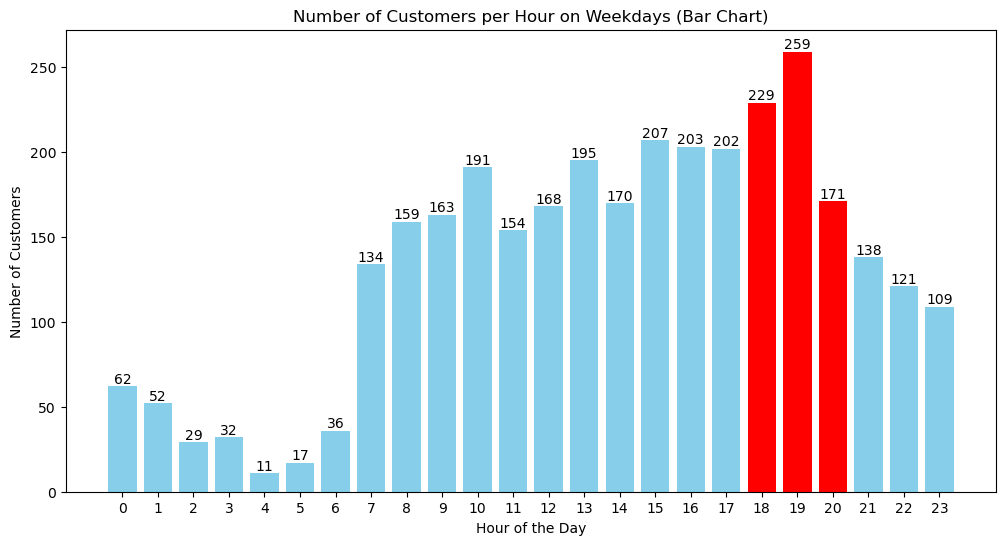

In [287]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Change color to 'red' for bars between 15 and 18 hours
colors = ['red' if 18 <= hour <= 20 else 'skyblue' for hour in perhour_weekdays.index]

plt.bar(perhour_weekdays.index, perhour_weekdays['Customer'], color=colors)

# Adding data labels
for i, txt in enumerate(perhour_weekdays['Customer']):
    plt.annotate(txt, (perhour_weekdays.index[i], txt), ha='center', va='bottom')

# Adding labels and title
plt.title('Number of Customers per Hour on Weekdays (Bar Chart)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')

# Customize x-axis ticks to show every hour
plt.xticks(range(24))

# Display the bar chart
plt.show()

Visualisasi ini menggambarkan jumlah pelanggan yang menggunakan taksi per jamnya pada hari kerja atau 'weekdays'. Apabila dilihat kembali, terdapat peningkatan pelanggan pada pukul 18.00 petang lalu mengalami penurunan mulai pada pukul 20.00 malam. Sehingga dapat disimpulkan bahwa pada peningkatan tersebut adalah saat terjadinya 'rush hour'

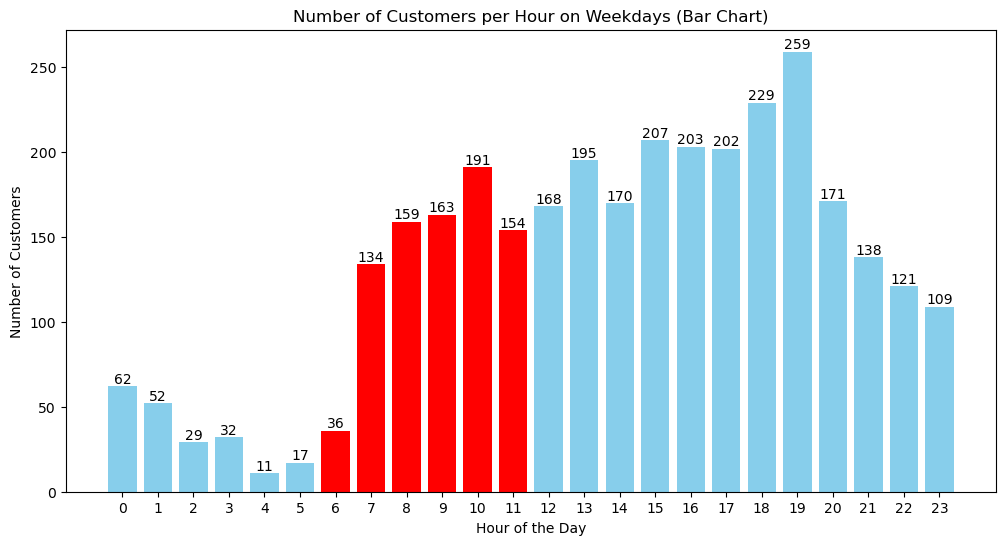

In [301]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Change color to 'red' for bars between 15 and 18 hours
colors = ['red' if 6 <= hour <= 11 else 'skyblue' for hour in perhour_weekdays.index]

plt.bar(perhour_weekdays.index, perhour_weekdays['Customer'], color=colors)

# Adding data labels
for i, txt in enumerate(perhour_weekdays['Customer']):
    plt.annotate(txt, (perhour_weekdays.index[i], txt), ha='center', va='bottom')

# Adding labels and title
plt.title('Number of Customers per Hour on Weekdays (Bar Chart)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')

# Customize x-axis ticks to show every hour
plt.xticks(range(24))

# Display the bar chart
plt.show()

Sama seperti visualisasi sebelumnya, dimana pada tampilan diatas terdapat peningkatan pelanggan pada pukul 7.00 pagi lalu mengalami penurunan mulai pada pukul 11.00 siang. Maka dapat disimpulkan bahwa hal tersebut terjadi 

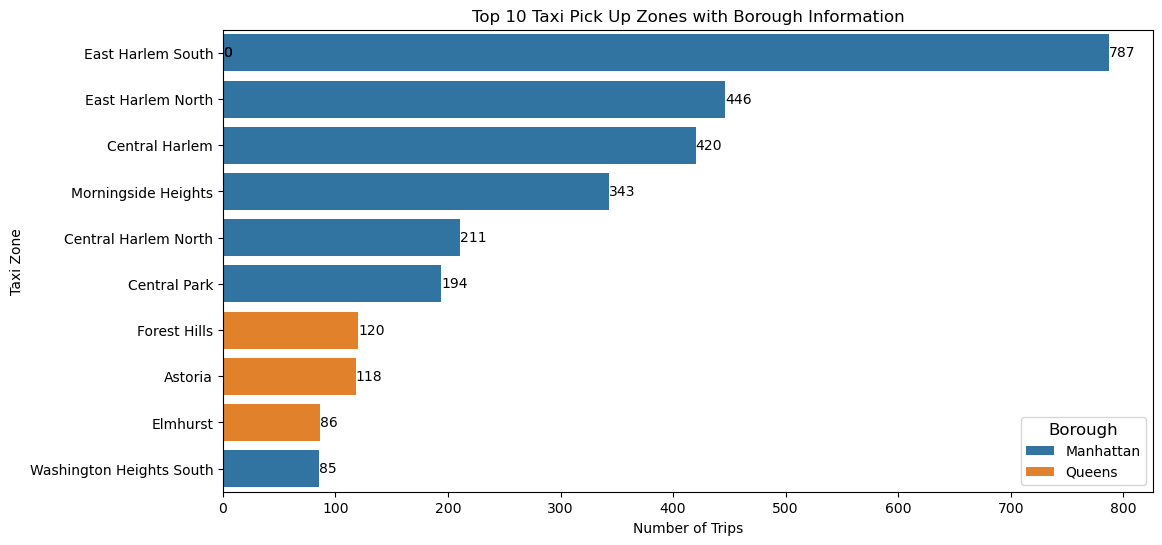

In [304]:
df# Select the top 10 values in the 'Zone' column
top_zones = df.groupby(['PUZone','Pickup_Borough'])['VendorID'].count().reset_index().sort_values(by= 'VendorID', ascending = False).rename(columns={'VendorID':'Number of Trips'}).head(10).set_index('PUZone')
top_zones

# Plotting the horizontal bar chart with Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Number of Trips', y=top_zones.index, hue='Pickup_Borough', data=top_zones, dodge=False)

# Adding labels and title
plt.title('Top 10 Taxi Pick Up Zones with Borough Information')
plt.xlabel('Number of Trips')
plt.ylabel('Taxi Zone')

# Add data labels to the horizontal bar chart
for p in barplot.patches:
    width = p.get_width()
    if np.isfinite(width):  # Check if width is finite
        plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha='left', va='center')

# Display the horizontal bar chart
plt.legend(title='Borough', title_fontsize='12')
plt.show()

Jumlah perjalanan terbanyak berasal dari wilayah Manhattan, dapat dilihat dari zona-zona teratas berasal dari wilayah Manhattan.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


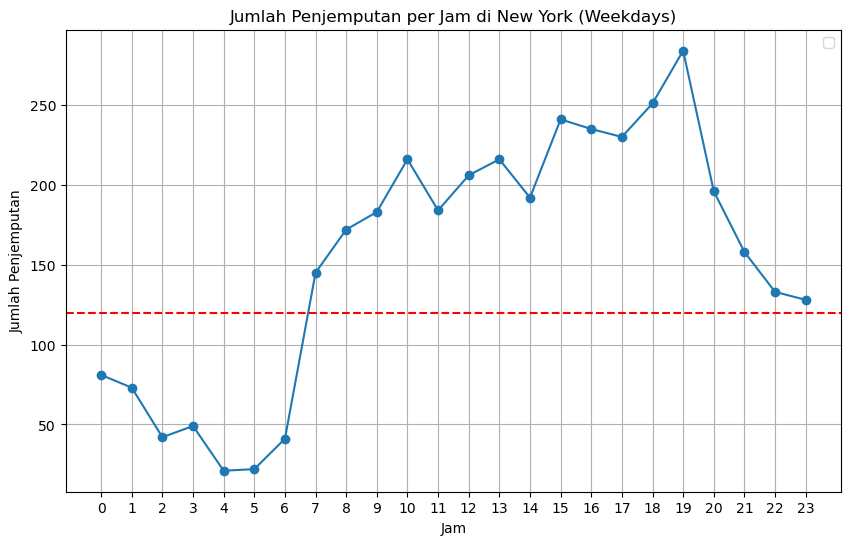

In [323]:
pickup_counts = df.groupby('PUHour').size().reset_index(name='pickup_count')

# Menghitung rata-rata jumlah penjemputan per jam
average_pickup_per_hour = pickup_counts['pickup_count'].mean()

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(pickup_counts['PUHour'], pickup_counts['pickup_count'], marker='o')
plt.title('Jumlah Penjemputan per Jam di New York (Weekdays)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penjemputan')
plt.xticks(range(24))
plt.axhline(y=120, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [299]:
nyc_locations = {
    "Manhattan": (40.7831, -73.9712),
    "Brooklyn": (40.6782, -73.9442),
    "Queens": (40.7282, -73.7949),
    "Bronx": (40.8448, -73.8648),
    "Staten Island": (40.5795, -74.1502)
}

# Membuat peta
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Menambahkan marker untuk setiap wilayah NYC
for borough, location in nyc_locations.items():
    folium.Marker(location=location, popup=borough).add_to(nyc_map)

# Menampilkan peta
nyc_map

In [284]:
# Lokasi koordinat untuk setiap lokasi
locations = {
    'East Harlem North': (40.7967, -73.9482),
    'East Harlem South': (40.7930, -73.9389),
    'Upper East Side North': (40.7759, -73.9465),
    'Forest Hills' : (40.7181, -73.8448),
    'Central Harlem' : (40.8116, -73.9465),
    'Morningside Heights' : (40.8106, -73.9626),
    'Central Harlem North' : (40.8150, -73.9417),
    'Upper West Side North' : (40.7946, -73.9707)
}

# DataFrame trip_counts (contoh data)
trip_counts = pd.DataFrame({
    'Trip': ['East Harlem North - East Harlem South', 'East Harlem South - East Harlem North', 
             'East Harlem North - Upper East Side North', 'Forest Hills - Forest Hills', 
             'East Harlem North - Central Harlem', 'East Harlem North - Morningside Heights', 
             'East Harlem North - East Harlem North', 'East Harlem North - Central Harlem North', 
             'East Harlem South - East Harlem South', 'East Harlem North - Upper West Side North'],
    'Count': [1939, 1416, 1153, 1123, 939, 917, 736, 722, 691, 680]
})

# Warna yang berbeda untuk setiap trip
colors = ['red', 'green', 'blue', 'brown', 'purple', 'salmon', 'orange', 'tosca', 'yellow', 'black']

# Membuat peta
world_map = folium.Map(location=[40.7896, -73.9597], zoom_start=13)

# Menambahkan marker untuk setiap lokasi
for location, coord in locations.items():
    folium.Marker(location=coord, popup=location).add_to(world_map)

# Menambahkan garis penghubung untuk setiap trip dan anotasi count
for i, row in trip_counts.iterrows():
    location_pair = row['Trip']
    location1, location2 = location_pair.split(" - ")
    location1_coord = locations.get(location1, None)
    location2_coord = locations.get(location2, None)
    if location1_coord is not None and location2_coord is not None:
        line = folium.PolyLine(locations=[location1_coord, location2_coord], color=colors[i], weight=2.5, tooltip=f'{location_pair} ({row["Count"]} trips)').add_to(world_map)

# Menampilkan peta
world_map

## 3 . Durasi & Jarak Perjalanan dengan Total Pembayaran

In [79]:
correlation = df['lpep_trip_datetime'].corr(df['total_payment'])

print(f"Korelasi antara Durasi Perjalanan dan Total Pembayaran: {correlation}")

Korelasi antara Durasi Perjalanan dan Total Pembayaran: -0.029358224918959532


                    lpep_trip_datetime  trip_distance  total_payment
lpep_trip_datetime            1.000000       0.482698       0.443725
trip_distance                 0.482698       1.000000       0.519625
total_payment                 0.443725       0.519625       1.000000


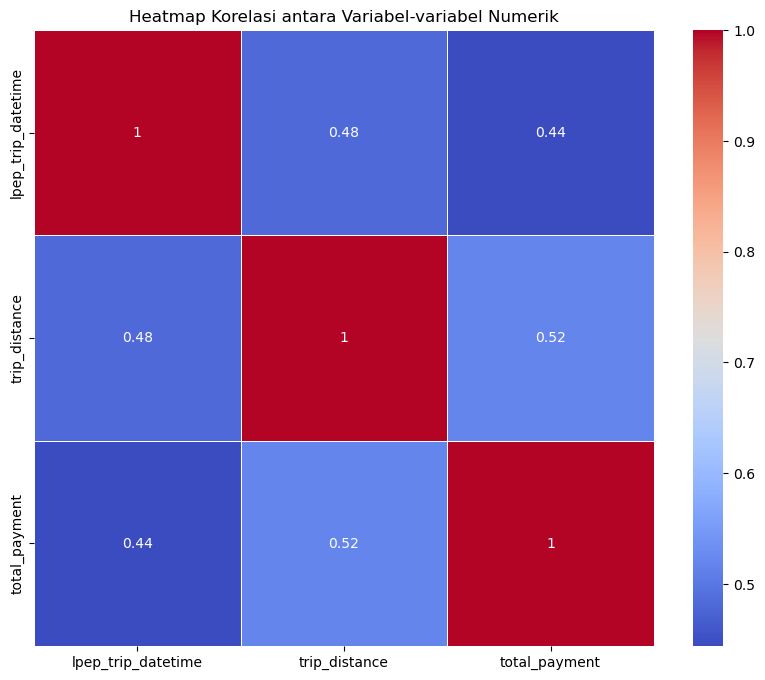

In [88]:
cols_to_corr = ['lpep_trip_datetime', 'trip_distance', 'total_payment']

# Menghitung matriks korelasi
correlation_matrix = df[cols_to_corr].corr(method='spearman')

# Menampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antara Variabel-variabel Numerik')
plt.show()

Terdapat korelasi positif (0.44) antara lpep_trip_datetime dan total_payment. Ini menunjukkan bahwa semakin lama durasi perjalanan maka total_payment akan cenderung lebih tinggi.

Korelasi positif (0.52) antara trip_distance dan total_payment, yang menunjukkan bahwa semakin jauh jarak perjalanannya yang maka total_payment yang harus dibayar penumpang akan cenderung lebih tinggi.

In [91]:
df['bin_distance']=pd.cut(df['trip_distance'],4)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,DOZone,lpep_trip_datetime,PUHour,DOHour,total_payment,PUday,bin_distance,mins,bin_trip_distance,bin_mins
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.70,3.0,...,Elmhurst/Maspeth,0,0,0,6.50,Sunday,"(-0.0254, 8.855]",0,"(0.81, 35.39]","(-0.001, 120.0]"
57,2,2023-01-01 00:06:48,2023-01-01 01:08:47,N,1.0,129,226,2.0,7.83,52.0,...,Sunnyside,1,0,1,54.50,Sunday,"(-0.0254, 8.855]",60,"(0.81, 35.39]","(-0.001, 120.0]"
62,2,2023-01-01 00:44:41,2023-01-01 00:48:26,N,1.0,42,168,1.0,1.26,7.2,...,Mott Haven/Port Morris,3,0,0,9.70,Sunday,"(-0.0254, 8.855]",180,"(0.81, 35.39]","(120.0, 180.0]"
70,1,2023-01-01 01:22:35,2023-01-01 01:25:11,N,1.0,42,116,1.0,0.60,5.1,...,Hamilton Heights,2,1,1,8.60,Sunday,"(-0.0254, 8.855]",120,"(0.5, 0.64]","(-0.001, 120.0]"
82,2,2023-01-01 01:03:59,2023-01-01 01:07:17,N,1.0,75,74,1.0,0.53,5.8,...,East Harlem North,3,1,1,8.30,Sunday,"(-0.0254, 8.855]",180,"(0.5, 0.64]","(120.0, 180.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,...,Williamsburg (South Side),1,22,22,6.20,Tuesday,"(-0.0254, 8.855]",60,"(0.009000000000000001, 0.36]","(-0.001, 120.0]"
63835,2,2023-01-31 22:59:41,2023-01-31 23:03:18,N,1.0,82,56,1.0,0.40,5.8,...,Corona,3,22,23,8.30,Tuesday,"(-0.0254, 8.855]",180,"(0.36, 0.5]","(120.0, 180.0]"
63863,2,2023-01-31 23:43:59,2023-01-31 23:47:22,N,1.0,7,7,1.0,0.72,5.8,...,Astoria,3,23,23,9.13,Tuesday,"(-0.0254, 8.855]",180,"(0.64, 0.81]","(120.0, 180.0]"
63874,2,2023-01-31 23:37:01,2023-01-31 23:40:38,N,1.0,129,260,2.0,0.91,6.5,...,Woodside,3,23,23,9.00,Tuesday,"(-0.0254, 8.855]",180,"(0.81, 35.39]","(120.0, 180.0]"


kolom trip_distance


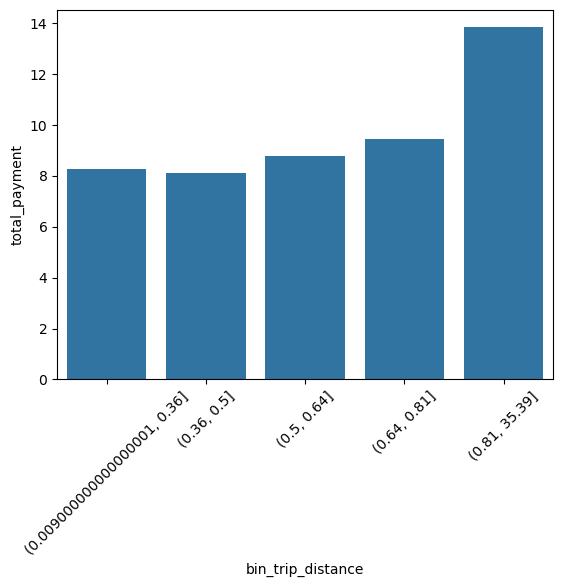

kolom mins


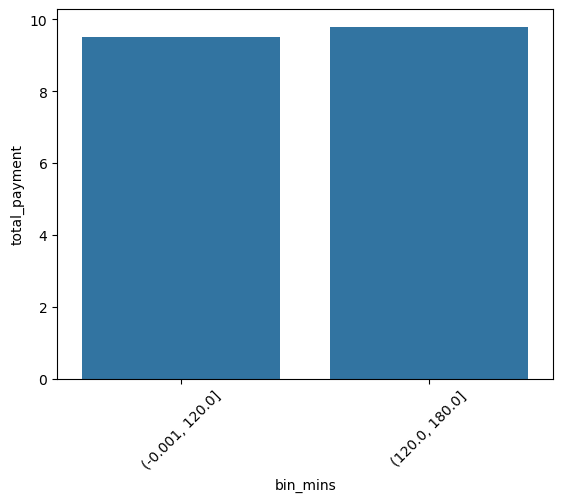

In [233]:
df['mins']=60*df['lpep_trip_datetime']
col=['trip_distance','mins']
for i in col:
    print(f'kolom {i}')
    df[f'bin_{i}']=pd.qcut(df[i],5,duplicates='drop')
    sns.barplot(data=df.groupby(f'bin_{i}')['total_payment'].mean().reset_index(),x=f'bin_{i}',y='total_payment')
    plt.xticks(rotation=45)
    plt.show()

## Kesimpulan

    1. Kesimpulan utama yang dapat diambil dari hasil analisis ini adalah terdapat perbedaan dari segi permintaan diantara wilayah-wilayah di New York. Bahkan dalam wilayah Manhattan sendiri terdapat perbedaan yang cukup signifikan antara zona-zona yang ada didalamnya. Hasil tersebut mencerminkan aktifitas masyarakat di wilayah Manhattan dapat dikatakan lebih padat apabila dibandingkan dengan wilayah-wilayah lainnya.
    
    2. Metode pembayaran dengan menggunakan kartu kredit menurut hasil analisis lebih banyak digunakan oleh pelanggan. Hal ini mungkin terjadi karena pembayaran menggunakan kartu kredit lebih praktis dan mudah apabila dibandingkan dengan uang tunai. Namun tidak semua wilayah menjadikan penggunaan kartu kredit sebagai metode pembayaran utama, contohnya seperti wilayah Queens yang tercatat penggunaan uang tunai lebih tinggi jika dibandingkan dengan penggunaan kartu kredit.
   
    3. Durasi perjalanan dan jarak perjalanan terbukti memiliki hubungan positif terhadap total yang harus dibayar oleh pelanggan yang artinya semakin lama durasi perjalanan maka total pembayaran akan semakin tinggi, begitu juga dengan jarak perjalanan dimana semakin jauh jarak yang ditempuh maka total pembayaran akan semakin tinggi.


## Rekomendasi

Berdasarkan kesimpulan dari hasil analisis yang sudah dilakukan, berikut rekomendasi yang ditawarkan:

    1. Optimasi Armada: Mendistribusikan armada yang telah disesuaikan dengan permintaan berdasarkan wilayah serta zona. Hal tersebut akan mencegah adanya kekurangan armada ketika terjadi kenaikan permintaan tinggi di wilayah dan zona tertentu, selain itu mencegah terjadinya kelebihan armada di wilayah dan zona yang permintaannya tidak setinggi wilayah lain seperti Manhattan.
    2. Penyesuaian Pembayaran : Meskipun mendorong pembayaran non-tunai, tetap pastikan kenyamanan bagi pelanggan yang memilih pembayaran tunai, terutama di wilayah seperti Queens. Misalnya, pastikan pengemudi selalu memiliki kembalian yang cukup. Melalui penyesuaian tersebut, harapannya akan meningkatkan kepuasan dan loyalitas pelanggan.
    3. Optimalisasi Rute: Implementasikan teknologi rute optimal untuk mengurangi durasi dan jarak perjalanan, sehingga pelanggan membayar lebih sedikit dan waktu tempuh menjadi lebih efisien. Ini bisa termasuk penggunaan aplikasi navigasi yang mempertimbangkan kondisi lalu lintas real-time.
